In [1]:
# 1 train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at 1 line only
one_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('1')]

In [5]:
# look at all station names
one_train_all['STATION'].unique()

array(['103 ST', '116 ST-COLUMBIA', '125 ST', '137 ST CITY COL', '14 ST',
       '145 ST', '14TH STREET', '157 ST', '168 ST', '18 ST', '181 ST',
       '191 ST', '207 ST', '215 ST', '23 ST', '231 ST', '238 ST', '28 ST',
       '34 ST-PENN STA', '42 ST-PORT AUTH', '50 ST', '59 ST COLUMBUS',
       '6 AV', '66 ST-LINCOLN', '72 ST', '79 ST', '86 ST', '96 ST',
       '9TH STREET', 'CANAL ST', 'CATHEDRAL PKWY', 'CHAMBERS ST',
       'CHRISTOPHER ST', 'CITY / BUS', 'DYCKMAN ST', 'EXCHANGE PLACE',
       'FRANKLIN ST', 'GROVE STREET', 'HARRISON', 'HOUSTON ST',
       'JOURNAL SQUARE', 'LACKAWANNA', 'MARBLE HILL-225', 'NEWARK BM BW',
       'NEWARK C', 'NEWARK HM HE', 'NEWARK HW BMEBE', 'PATH NEW WTC',
       'PATH WTC 2', 'PAVONIA/NEWPORT', 'RECTOR ST', 'SOUTH FERRY',
       'ST. GEORGE', 'THIRTY ST', 'THIRTY THIRD ST', 'TIMES SQ-42 ST',
       'TOMPKINSVILLE', 'TWENTY THIRD ST', 'V.CORTLANDT PK',
       'WHITEHALL S-FRY', 'WTC-CORTLANDT'], dtype=object)

In [6]:
# check station count
one_train_all['STATION'].count()

68

In [8]:
# needs further cleaning
one_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)
one_train_all["STATION"].replace("6 AV", value="14 ST", inplace=True)
one_train_all["STATION"].replace("WHITEHALL S-FRY", value="SOUTH FERRY", inplace=True)

In [10]:
# now sum same name rows
one_commuters = one_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
one_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
103 ST,7888.0,1943.0
116 ST-COLUMBIA,2438.0,3837.0
125 ST,1815.0,1568.0
137 ST CITY COL,11771.0,4268.0
14 ST,6159.0,8166.0


In [11]:
# order stations in excel
# save as csv
one_commuters.to_csv('one_commuters.csv')

In [12]:
# open ordered CSV
csv_path_1 = 'one_commuters_order.csv'
one_commuters_order = pd.read_csv(csv_path_1, encoding="utf-8")
one_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,V.CORTLANDT PK,7117,566
1,238 ST,1247,54
2,231 ST,7200,186
3,MARBLE HILL-225,3210,193
4,215 ST,537,146


In [13]:
one_commuters_order['AM_AVG_ENTER'] = one_commuters_order['AM_ENTERS']/5

In [14]:
one_commuters_order['AM_AVG_EXIT'] = one_commuters_order['AM_EXITS']/5
one_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,V.CORTLANDT PK,7117,566,1423.4,113.2
1,238 ST,1247,54,249.4,10.8
2,231 ST,7200,186,1440.0,37.2
3,MARBLE HILL-225,3210,193,642.0,38.6
4,215 ST,537,146,107.4,29.2


In [15]:
# order stations in excel
# save as csv
one_commuters_order.to_csv('one_commuters_final.csv')

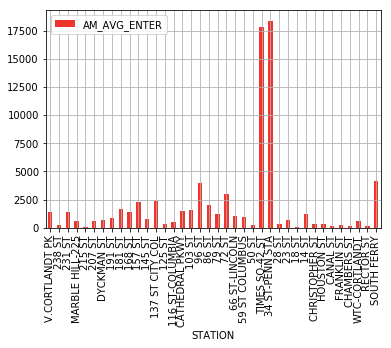

In [16]:
# graph 1 Train AM AVG ENTERS
plt = one_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('1-AM-enter.pdf')

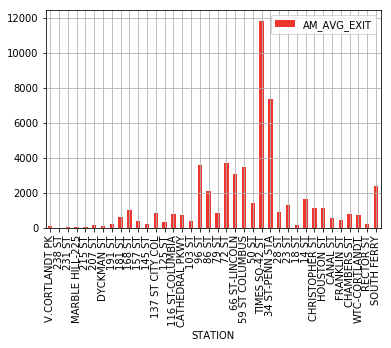

In [17]:
# graph 1 Train AM AVG EXITS
plt = one_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('1-AM-exit.pdf')